# Installing Python Libraries
The following libraries are being use for the analysis:
- pandas 
- matplotlib
- seaborn
- scikit-learn

You can perform `pip install -r requirements.txt` to install the components all in one go in your virtual environment.


# Import the Data
### Read the CSV Files :



In [1]:
import pandas as pd
import os
ROOT_DIR = os.getcwd()
CSVPath = os.path.join(ROOT_DIR,"Data","2019.csv")
df  = pd.read_csv(CSVPath)
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Get Preliminary Dataset Info and Data Type

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# Data Cleansing

Preparing the Data for Further Analysis.

### Check for NANs:

In [4]:
df.isnull().values.any()

False

No NANs found. Hence Proceed as the Dataset is pretty clean in itself at this stage.

# Data Insights

### Imports and Setup :

For Rich Visualizations, use `Seaborn` & `Matplotlib`.  
Add a Utility Function to `Save Visualizations`.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

VizPath = os.path.join(ROOT_DIR,"Visualizations")

def save_viz(VizName,plotvar,VizPath= os.path.join(ROOT_DIR,"Visualizations"),dotsperinches = 600):
    plotvar.savefig(str(os.path.join(VizPath,VizName))+'.png',dpi=dotsperinches)

### Data Distribution Analysis:

**What type of Data are we Analyzing?**

It is often wise to understand the structure in datasets by studying there Distribution.

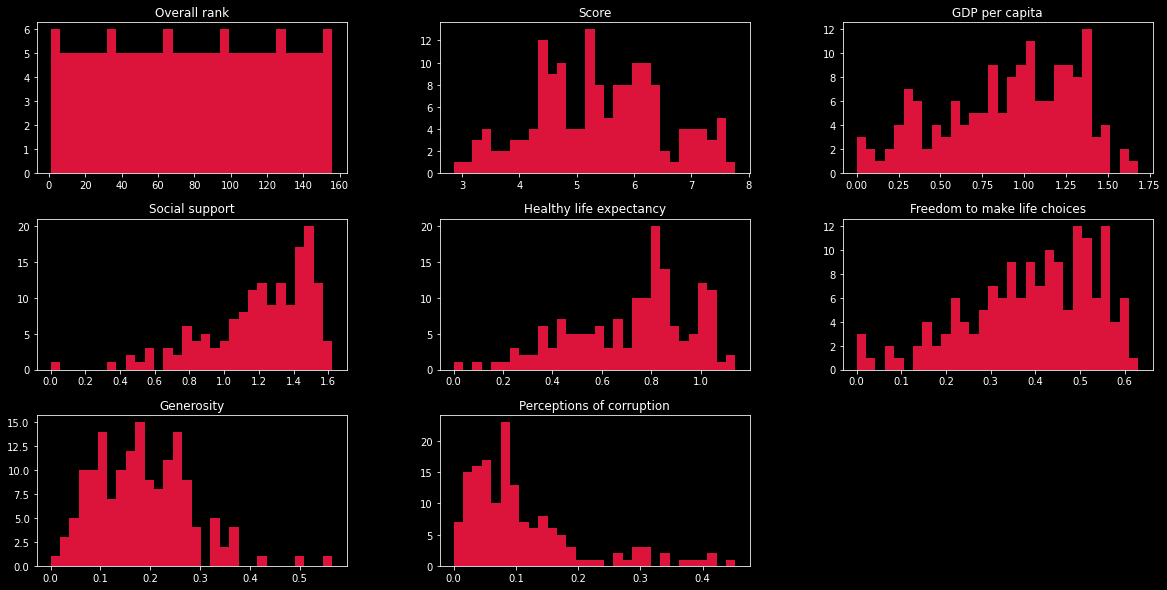

In [6]:
df.hist(bins=30,figsize=(20,10),grid=False,color="crimson"); # distribution of each column
save_viz('HistPlot_Data',plt)

The Nature of the Variable Distribution is more clear now: 
- Most of the variables are more of a Normal (Gaussian) Curve. 
- The `Rank` of each country is constant in its distribution as expected.

### Detailed Correlation Matrix Analysis

**How are the features in our dataset related to each other?**

The correlation coefficient ranges from -1 to 1.  
If the value is close to 1, it means that there is a strong positive correlation between the two variables and both increase or decrease simultaneously.  
When it is close to -1, the relationship between the variables is negatively correlated, or as one value increases, the other decreases.



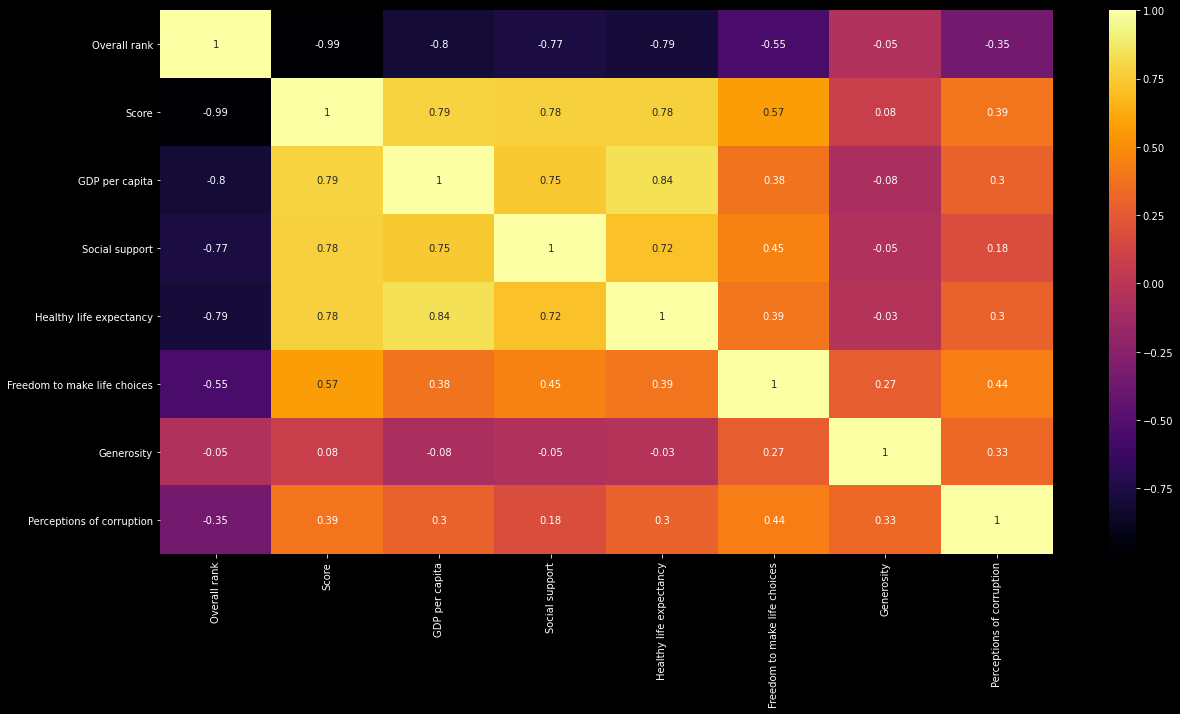

In [7]:
correlation_matrix = df.corr().round(2) #default method = ‘pearson’, also available : ‘kendall’, ‘spearman’ correlation coefficients
plt.figure(figsize=(20,10)) #set the figure size to display 
sns.heatmap(data=correlation_matrix,cmap="inferno", annot=True)  # annot = True to print the values inside the squares
save_viz('Correlation_Data',plt)

**Which attributes are related to the Score?**

In [8]:
thres_range=(-0.5,0.5) # provide the upper and lower limits for thresholding the strongly correlated features
target_variable="Score"  # provide the target variable name


def get_strong_corr(correlation_matrix,target_variable,thres_range=(-0.65,0.65)): 
    """
    Get the strongly positive and strongly negatively correlated components from the provided correlation matrix.
    Assigns values inside boundary to 0 and returns non zero entries as a Pandas Series. correlation_matrix : The correlation matrix obtained
    from the data.
    target_variable	: The name of the target variable that we need to calculate the correlation for. thres_range	: The thresholding range
    for the calculation of strongly correlated data.
    """
    thres_min,thres_max=thres_range # assign minimum and maximum values passed to threshold
    target_row=correlation_matrix[target_variable] # get the row with the target variable name
    target_row[(target_row > thres_min) & (target_row < thres_max)]=0 
    # assign values out of given threshold to zero
    indices_thresholded=target_row.to_numpy().nonzero()
    # remove the zero values from the filtered target row and get indices
    strong_corr=list(correlation_matrix.columns[indices_thresholded])
    # extract feature names from their respective indices
    if target_variable in strong_corr: 
        strong_corr.remove(target_variable)
    # correlation of target variable with itself is always 1, remove it.
    return target_row[strong_corr] # return the strongly correlated features with their values

strong_corr=get_strong_corr(correlation_matrix,target_variable,thres_range) 
print(strong_corr)


Overall rank                   -0.99
GDP per capita                  0.79
Social support                  0.78
Healthy life expectancy         0.78
Freedom to make life choices    0.57
Name: Score, dtype: float64


- Clearly, It is quite apparent that `GDP per capita` , `Social support` & `Healthy life expectancy` have a strong positive correlation between the `Scores` because the Score is derived using these factors themselves. 

- Also ,since the top ranked countries will have a higher score, hence the correlation is found out to be extremely inversely related which is very obserant of the data.


### Generalized Pairplot :
**How are all the variables related to each other?**  
Let us get a general overview of the dataset with respect to all the variables

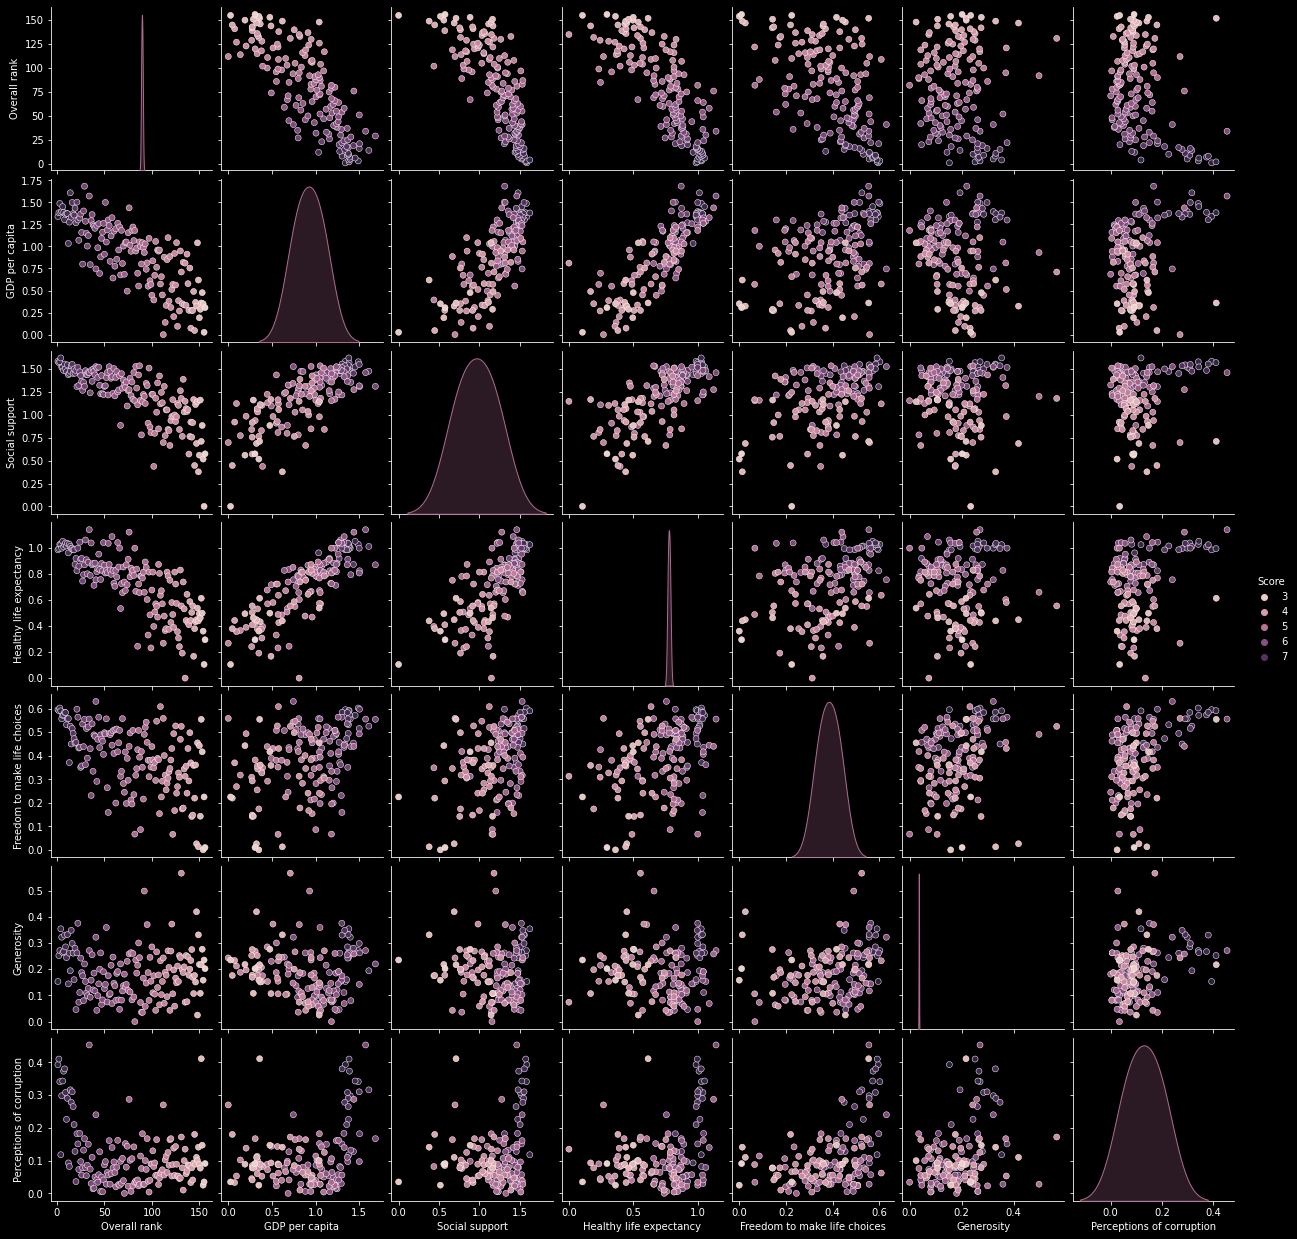

In [14]:
import warnings
warnings.filterwarnings("ignore")
# Since the top rank countries will have a higher score, they will have 0 variance and wil cause problems in density estimation

sns.set_palette("tab10")
sns.pairplot(df, hue=target_variable)
save_viz('Generalized_PairPlot',plt)

### High Correlation Pairplot :
**How are all the variables related to each other?**  
Now that we have a general overview of the dataset, we will try to get a specefic view of it using the only variables of interest, i.e, `GDP per capita` , `Social support` & `Healthy life expectancy` vs `Scores`.

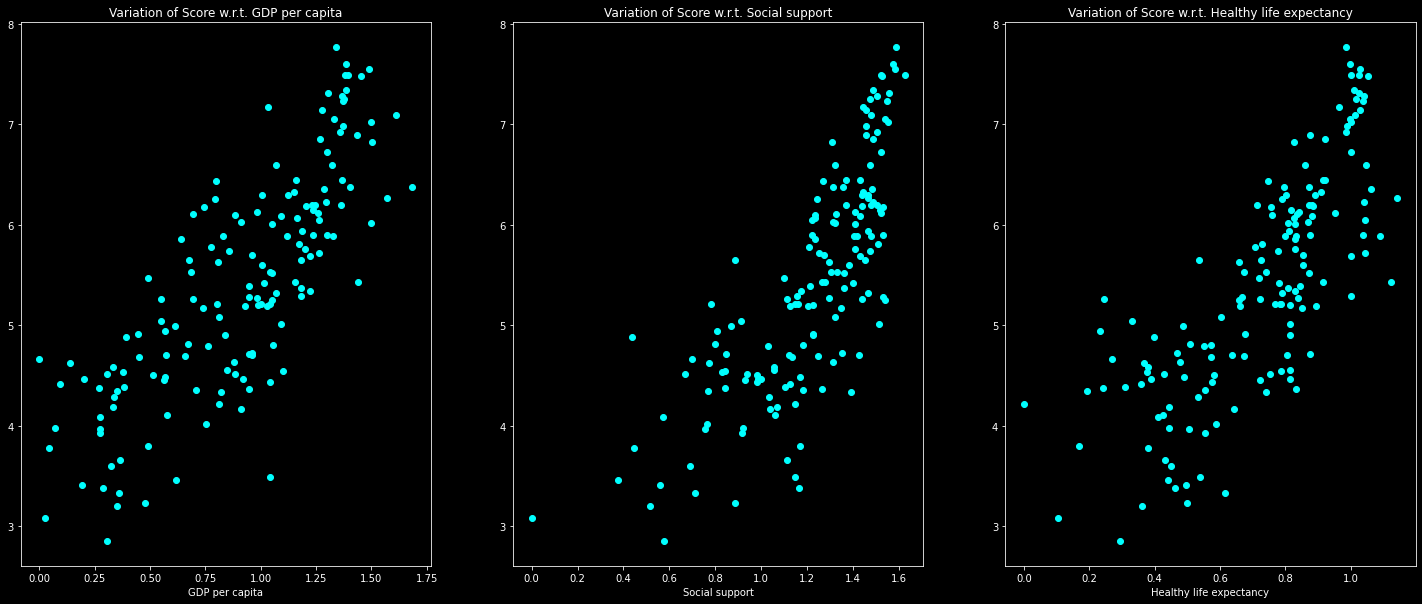

In [17]:
plt.figure(figsize=(25,10)) # initialize the figure with a figure size
target = df[target_variable]
features = ['GDP per capita' , 'Social support', 'Healthy life expectancy'] # features to display over the dataset
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1) 
    x = df[col]
    plt.scatter(x, target, marker='o',color="cyan") 
    # loop over the features with count over x & target
    # subplotting
    # getting the column values from the dataframe
    # performing a scatterplot in matplotlib
    plt.title("Variation of "+target_variable+" w.r.t. "+col)  # setting subplot title
    plt.xlabel(col)	# setting the xlabels and ylabels plt.ylabel(target_variable)
save_viz('Specific_PairPlot',plt)

It is now more clear how much the contribution of each Variable is towards the Overall Score of the countries.

### Boxplot:
**How spread is the data? Is it skewed?**  
To better understand how well distributed the data is & to look for Data Anomalies, we make a BoxPlot :

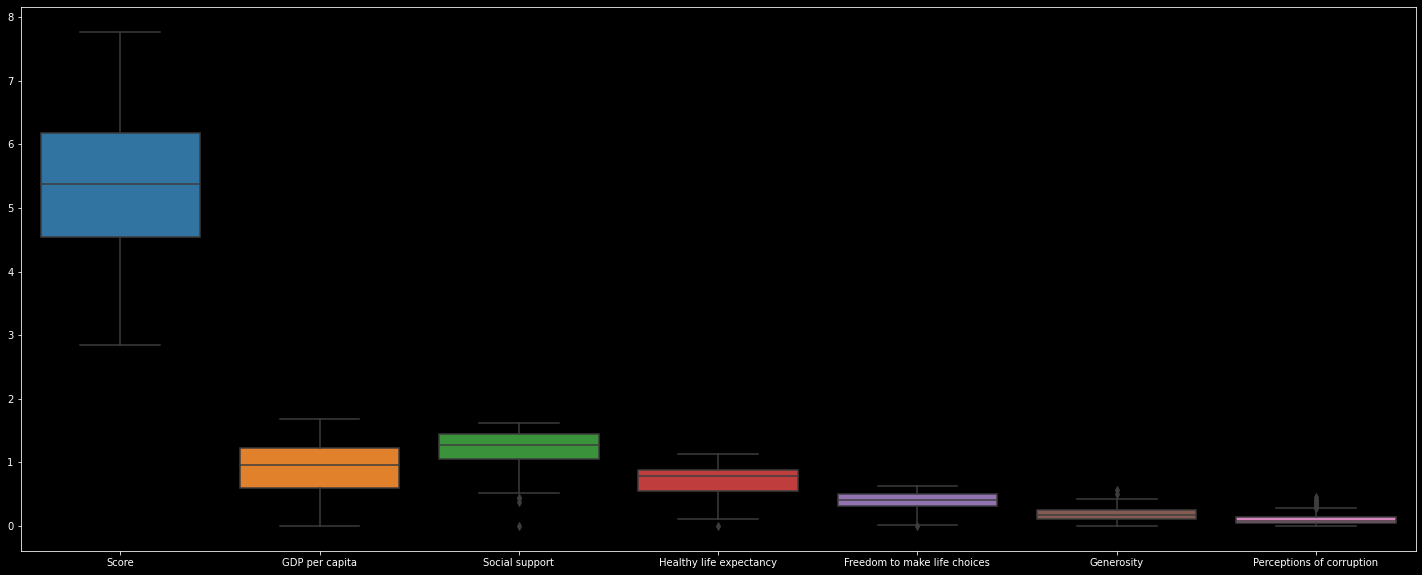

In [26]:
new_df = df.drop(["Overall rank"],axis =1) # remove rank, create a new dataset
plt.figure(figsize=(25,10)) # initialize the figure with a figure size
sns.boxplot(data = new_df)
save_viz('BoxPlot_Vars',plt)

The `Score` is well spread, but most of the other variables are saturated (concentrated on specefic short intervals).

### Line Plot:
**Is there any pattern in the Top and Bottom Ranked Countries?**  
Let us try to get line plots for the top 5 ranked countries and visualize them!

In [49]:
df_top = df.sort_values('Overall rank',ascending = True).head(5)
df_top.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Normalization : Data Cleaning - Rescaling Dataset
Since we wish to compare the countries with attributes and not values and as the range of the data is quite different, let us scale the data to `[0,1]` range.

In [52]:
df_top.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [61]:
from sklearn import preprocessing
remove_cols = ['Overall rank','Country or region']

def subtract_lists(x,y):
    return [item for item in x if item not in y]
x = df_top.drop(remove_cols,axis=1).values #returns a numpy array, remove non numeric nd irrelevant vars
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled,columns = subtract_lists(df_top.columns,remove_cols) )
scaled_df['Country or region'] = list(df_top['Country or region']) #add non numeric col back to df

scaled_df = scaled_df.set_index('Country or region')
scaled_df = scaled_df.T
scaled_df.head(10)

Country or region,Finland,Denmark,Norway,Iceland,Netherlands
Score,1.000000,0.398577,0.234875,0.021352,0.000000
GDP per capita,0.000000,0.290541,1.000000,0.270270,0.378378
Social support,0.637255,0.500000,0.588235,1.000000,0.000000
Healthy life expectancy,0.000000,0.238095,1.000000,0.952381,0.309524
Freedom to make life choices,0.847826,0.760870,1.000000,0.739130,0.000000
Generosity,0.000000,0.492537,0.587065,1.000000,0.840796
Perceptions of corruption,0.941781,1.000000,0.763699,0.000000,0.616438


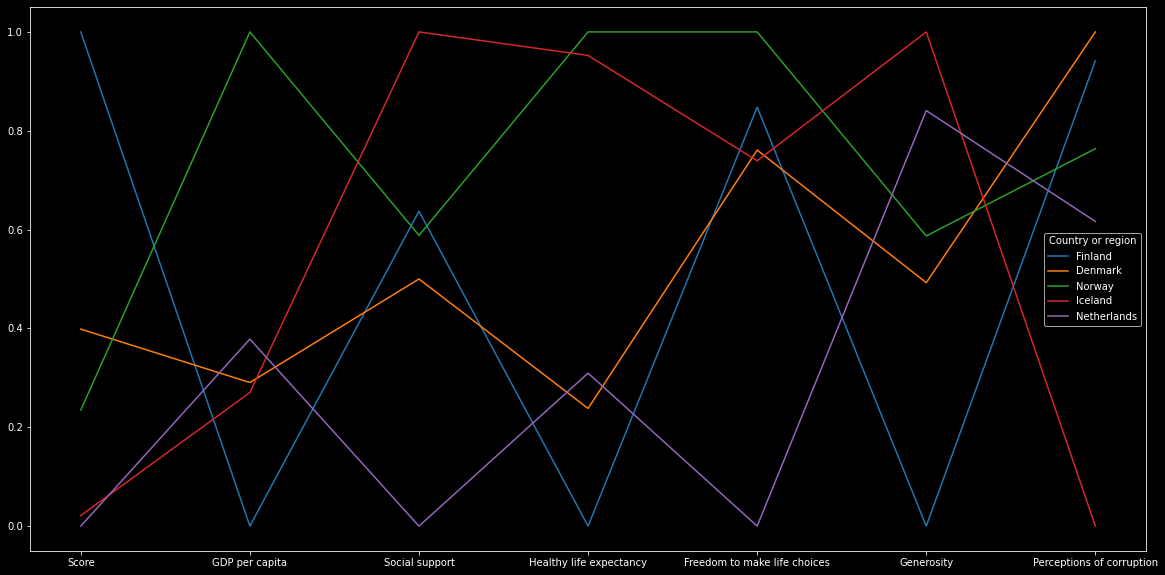

In [62]:
scaled_df.plot.line(figsize=(20,10))
save_viz('LinePlot_Top10',plt)

- Although `Finland` has the first rank, it has a relatively low value of `GDP per capita`, `Healthy life expectancy` and `Generosity` as compared to the other top countries.
- The Comparisons are rather mixed and don not follow a specific trend for the highly ranked countries. 


Let us see the Lowest Ranked Countries too !

In [71]:
df_low = df.sort_values('Overall rank',ascending = False).head(5)
df_low.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411


In [75]:
remove_cols = ['Overall rank','Country or region']

x = df_low.drop(remove_cols,axis=1).values #returns a numpy array, remove non numeric nd irrelevant vars
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled,columns = subtract_lists(df_low.columns,remove_cols) )
scaled_df['Country or region'] = list(df_low['Country or region']) #add non numeric col back to df
scaled_df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region
0,0.000000,0.622222,0.649718,0.373281,0.018018,0.372881,0.170984,South Sudan
1,0.478170,0.000000,0.000000,0.000000,0.405405,0.652542,0.025907,Central African Republic
2,0.727651,0.720000,0.584181,0.502947,0.000000,0.000000,0.000000,Afghanistan
3,0.785863,1.000000,1.000000,0.774067,0.751351,1.000000,0.316062,Tanzania
4,1.000000,0.740000,0.803390,1.000000,1.000000,0.500000,1.000000,Rwanda


In [76]:
scaled_df = scaled_df.set_index('Country or region')
scaled_df = scaled_df.T

scaled_df.head()

Country or region,South Sudan,Central African Republic,Afghanistan,Tanzania,Rwanda
Score,0.000000,0.478170,0.727651,0.785863,1.00000
GDP per capita,0.622222,0.000000,0.720000,1.000000,0.74000
Social support,0.649718,0.000000,0.584181,1.000000,0.80339
Healthy life expectancy,0.373281,0.000000,0.502947,0.774067,1.00000
Freedom to make life choices,0.018018,0.405405,0.000000,0.751351,1.00000


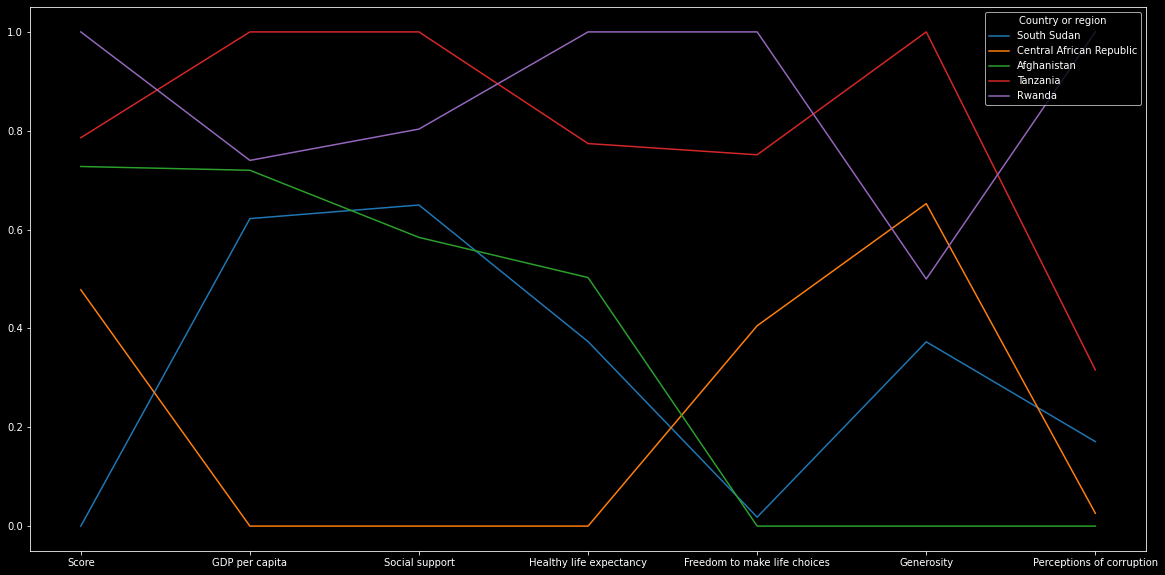

In [77]:

scaled_df.plot.line(figsize=(20,10))
save_viz('LinePlot_Low10',plt)

Similarly the lowest 5 countries do not show any specific trends and are quite mixed in itself.
